In [1]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib
%matplotlib inline

In [2]:
df = pd.read_csv('email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [3]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [4]:
df.duplicated().sum()

415

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df= df[df['Category'].isin(['ham', 'spam'])]

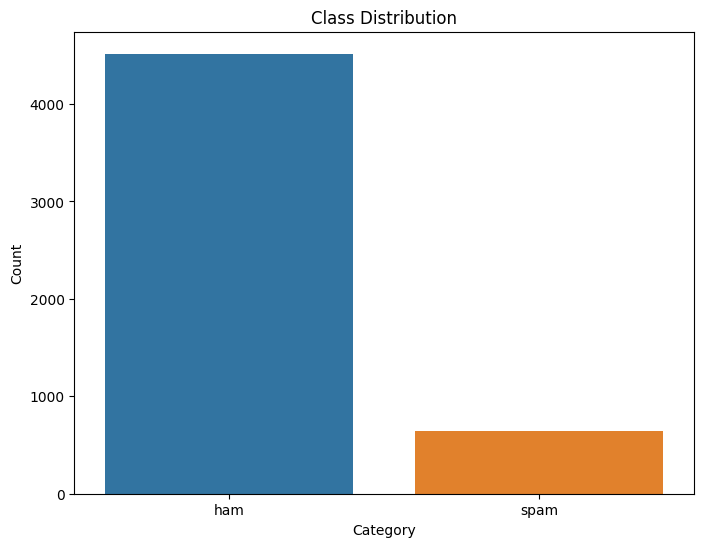

In [8]:
# Plotting class distribution

plt.figure(figsize=(8, 6))
sns.countplot(x="Category",data=df)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [9]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')


# Combine all messages for each category

spam_messages=" ".join(df[df['Category']=='spam']['Message'])
ham_messages=" ".join(df[df['Category']=='ham']['Message'])

# Function to generate word cloud

def generate_wordcloud(text,title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


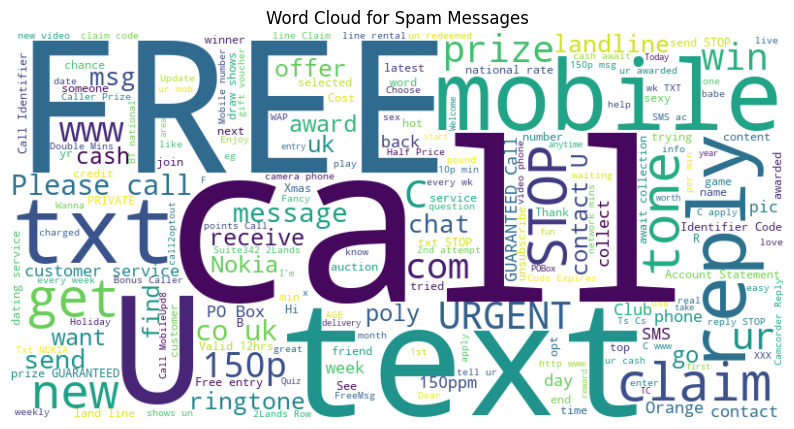

In [10]:
# Generating word cloud for 'spam' messages
generate_wordcloud(spam_messages, 'Word Cloud for Spam Messages')

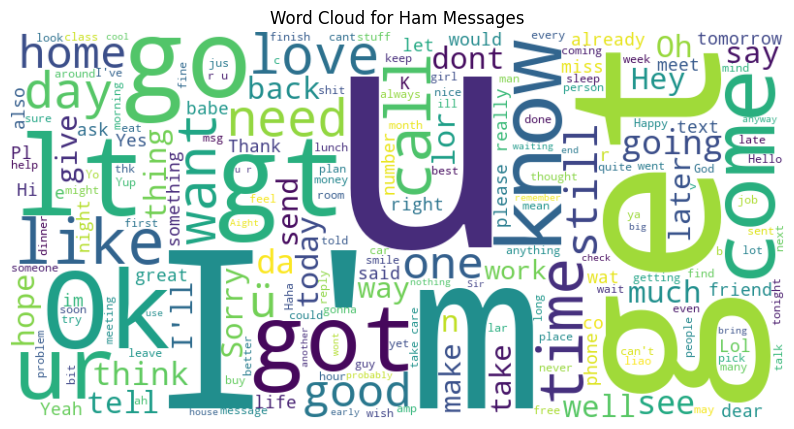

In [11]:
# Generating word cloud for 'ham' messages
generate_wordcloud(ham_messages, 'Word Cloud for Ham Messages')

In [12]:
# Vectorization

cv=CountVectorizer()
x=df["Message"]
 # Convert labels to binary values
y=df["Category"].apply(lambda x:1 if x=="spam" else 0)
x_vectorized = cv.fit_transform(x)

# Adressing class imbalance using SMOTE

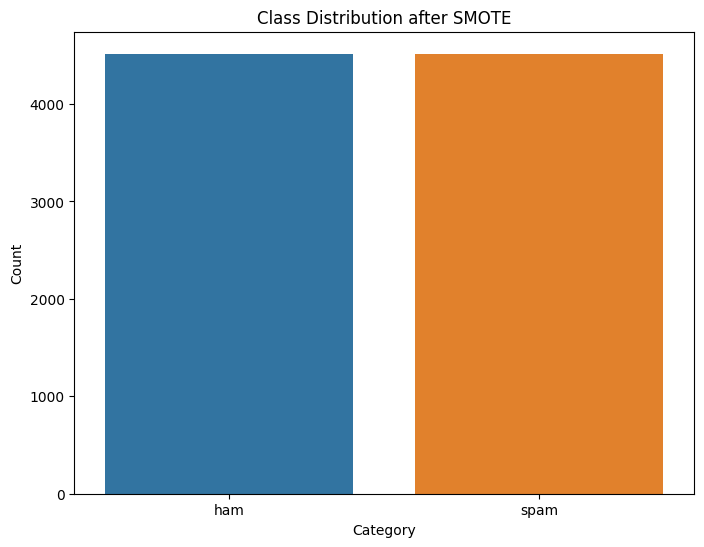

In [13]:
# SMOTE oversampling

smote = imblearn.over_sampling.SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_vectorized, y)
# Plotting class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([0, 1], ['ham', 'spam'])  # Assuming 0 corresponds to 'ham' and 1 corresponds to 'spam'
plt.show()

# Model building and training

In [14]:
# Splitting Dataset

x_train, x_test, y_train, y_test =train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [15]:
# Build the Deep Learning Model

from keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1]))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.7))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()




c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       557,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 559,553 (2.13 MB)

 Trainable params: 559,553 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
print(y_train.shape)

(7225,)


In [17]:
print(y_test.shape)

(1807,)


In [18]:

# Convert sparse matrices to dense
x_train = x_train.toarray()
x_test = x_test.toarray()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7973 - loss: 0.4557 - val_accuracy: 0.9685 - val_loss: 0.1304
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0980 - val_accuracy: 0.9723 - val_loss: 0.1004
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0574 - val_accuracy: 0.9779 - val_loss: 0.0931
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0353 - val_accuracy: 0.9784 - val_loss: 0.0956
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9917 - loss: 0.0286 - val_accuracy: 0.9784 - val_loss: 0.1049
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9953 - loss: 0.0159 - val_accuracy: 0.9790 - val_loss: 0.1166
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9944 - loss: 0.0213 - val_accuracy: 0.9790 - val_loss: 0.1159
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9980 - loss: 0.0083 - val_accuracy: 0.

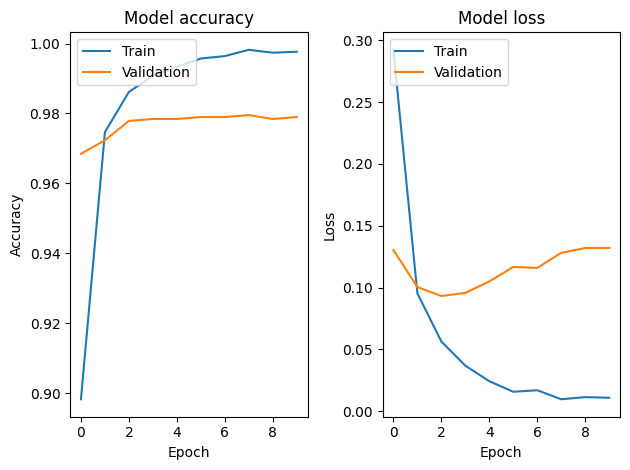

In [19]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Model Evaluation

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9790
Precision: 0.9699
Recall: 0.9890
F1 score: 0.9794


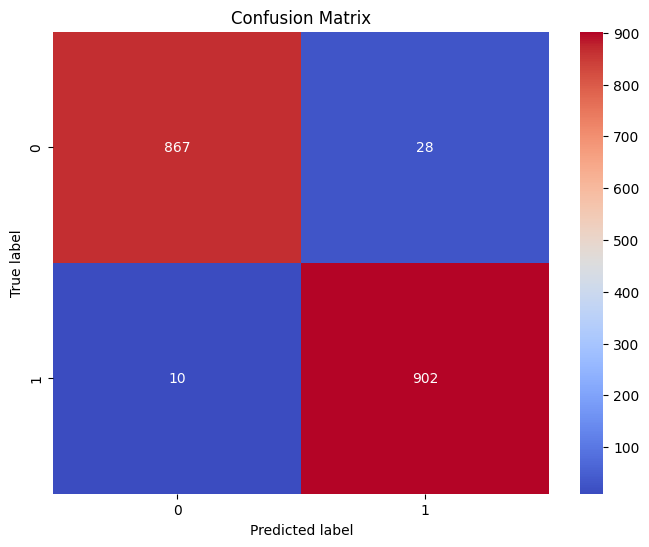

In [20]:
# Evaluate the model
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}') 


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Saving the file

In [25]:
# Save the CountVectorizer to disk
vectorizer_filename = 'count_vectorizer.pkl'
joblib.dump(cv, vectorizer_filename)
# Save the trained model to disk
model_filename = 'spam_classifier_model.keras'
model.save(model_filename)

# Deployment

## Step-by-Step Deployment Guide

1.Create a Deployment Branch:
Start by creating a separate branch called Deployment in your project repository. This branch will only contain the necessary files for deployment.

1.Set Up AWS Instance:
Log in to your AWS Console and navigate to EC2

2.Launch Instance:

Click on “Launch Instance” and follow the setup instructions below:
Make sure to select an appropriate instance type and configuration. Click “Launch Instance” to proceed.






3.Configure Security Groups:

After launching your instance, ensure that it’s running. Click on the instance ID and navigate to the Security tab.
Edit inbound rules to expose port 8501 (Streamlit’s default port).

4.Connect to Your Instance:

Go back to your instance details and click on “Connect”.
Follow the instructions to connect to your instance using SSH.

5. run nano deploy.sh and paste below contents

⚠️Make sure Ctrl+S and Ctrl+X after pasting the contents

#!/bin/bash

# Update the package lists and install updates
echo "Updating package lists and installing updates..."
sudo apt update
sudo apt upgrade -y

# Install Python 3, pip, virtualenv, and Git
echo "Installing Python 3, pip, virtualenv, and Git..."
sudo apt install -y python3-pip python3-venv git

# Clone the repository (replace with your actual repository URL if different)
echo "Cloning the repository..."
git clone -b Deployment https://github.com/Harshithvarma007/Spam-email.git
cd Spam-email  # Adjust this to your repository's directory structure

# Set up virtual environment
echo "Setting up virtual environment..."
python3 -m venv venv
source venv/bin/activate

# Install Python dependencies
echo "Installing Python dependencies..."
pip install -r requirements.txt

# Create systemd service file for Streamlit
echo "Creating systemd service file..."
cat <<EOF > streamlit.service
[Unit]
Description=Streamlit Web Application

[Service]
Type=simple
ExecStart=$(pwd)/venv/bin/streamlit run $(pwd)/app.py --server.port 8501
WorkingDirectory=$(pwd)
User=ubuntu
Group=ubuntu
Restart=always

[Install]
WantedBy=multi-user.target
EOF

# Move systemd service file to /etc/systemd/system/
echo "Moving systemd service file to /etc/systemd/system/..."
sudo mv streamlit.service /etc/systemd/system/

# Reload systemd to read the new service file
echo "Reloading systemd..."
sudo systemctl daemon-reload

# Enable and start Streamlit service
echo "Enabling and starting Streamlit service..."
sudo systemctl enable streamlit
sudo systemctl start streamlit

# Check Streamlit service status
echo "Streamlit service status:"
sudo systemctl status streamlit

6.Make it executable:

chmod +x deploy.sh

7.Run the script:

./deploy.sh

8.Access Your Deployed Application:

Copy the IPv4 address from your AWS Instance Summary.
Open a new browser tab, paste the address followed by port 8501 (e.g., http://<your_ip_address>:8501).